# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

We are going to work with the Vehicles dataset.

# The goal of this project is to develop a model that predicts the price of a used car based on various features, such as manufacturer, model, condition, cylinder count, fuel type, odometer reading, title status, transmission type, drive configuration, size, region, and state. This problem can be addressed by building a regression model that identifies the most significant features affecting price and uses them to generate an accurate price estimate as the output

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Import general libraries to Data Understanding

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [59]:
vehicles = pd.read_csv("data/vehicles.csv")

Getting familiar with the data

In [60]:
vehicles.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [61]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f


The features that potentially influence the price of used cars: year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, trasmission, size, type, paint_color, state, region


In [62]:
vehicles.isnull().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [63]:
vehicles = vehicles.convert_dtypes()
vehicles.describe(include=['string'])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


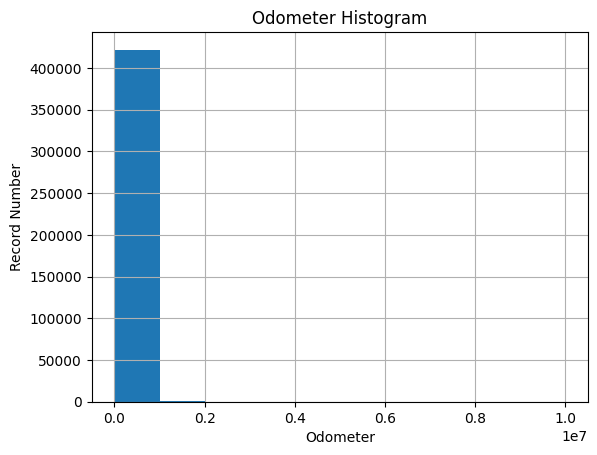

In [64]:
vehicles["odometer"].hist()
plt.title('Odometer Histogram')
plt.xlabel('Odometer')
plt.ylabel('Record Number')
plt.show()

Evaluate how many values are equal to 0 in all columns

In [65]:
vehicles.eq(0).sum()

,0
id,0
region,0
price,32895
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,1965


In [66]:
vehicles_pcero = vehicles.loc[vehicles["price"] == 0]

In [67]:
vehicles_pcero.shape

(32895, 18)

7.7% of the total records on the Dataset has price = 0. In this section we will evaluate any possible relationship with other columns but no correlation is identified.

In [68]:
vehicles_odocero = vehicles.loc[vehicles["odometer"] == 0]

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'odometer'}>]], dtype=object)

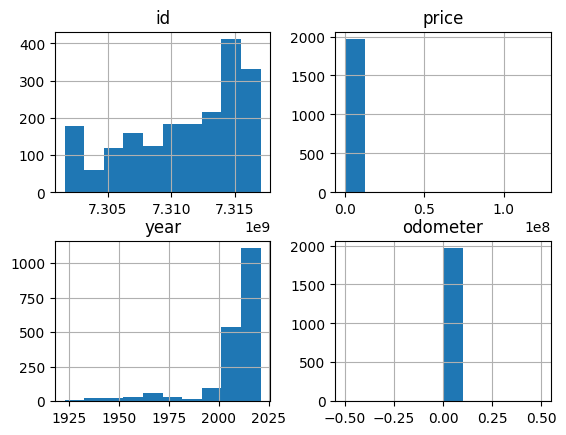

In [69]:
vehicles_odocero.hist()

In [70]:
# Calculate the percentage of records with odometer equal to zero and price equal to zero
odometer_zero_price_zero = vehicles[(vehicles["odometer"] == 0) & (vehicles["price"] == 0)].shape[0]
odometer_zero = vehicles[vehicles["odometer"] == 0].shape[0]
percentage = (odometer_zero_price_zero / odometer_zero) * 100

print(f"{percentage:.2f}% of records with odometer equal to zero have price equal to zero.")

43.31% of records with odometer equal to zero have price equal to zero.


In [71]:
print(vehicles_odocero['year'].value_counts().sort_values(ascending=False))

year
2014    248
2015    196
2016    156
2013    144
2021    136
       ... 
1942      1
1923      1
1953      1
1962      1
1984      1
Name: count, Length: 87, dtype: Int64


Finding: 43% of the records with an odometer equal to zero have a price equal to zero too.

Additionally, records with an odometer equal to zero are more inclined towards recent years, starting around 1990.

A possible logical reason may be that the population has stopped smoking significantly in recent decades. It may also be related with modern cars have a better ignition system. ventilation which in careful users can result in those results.

The majority of record with odometer = 0 is in 2014 cars. This can be associated with problems with odor measurement on those car, but because I don't find correlation with the data

A future suggestion is investigate more the business to be able to make any infer on this feature

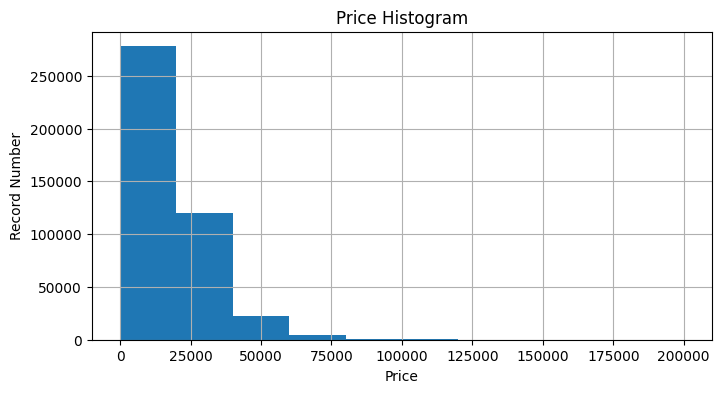

In [72]:
plt.figure(figsize=(8,4))
vehicles['price'].drop(vehicles[vehicles['price'].gt(200000)].index).hist()
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Record Number')
plt.show()

Price > $100,000 outliers

In [73]:
vehicles.manufacturer.unique()
print(vehicles['manufacturer'].value_counts())

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

In [74]:
vehicles.model.unique()
print(vehicles['model'].value_counts())

model
f-150                        8009
silverado 1500               5140
1500                         4211
camry                        3135
silverado                    3023
                             ... 
cr-v lx automatic               1
tacoma double cab trd 4x4       1
avenger r/t 4dr sedan           1
yukon xl slt suv                1
Paige Glenbrook Touring         1
Name: count, Length: 29649, dtype: Int64


In [75]:
vehicles.title_status.unique()
print(vehicles['title_status'].value_counts())

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: Int64


In [76]:
vehicles.condition.unique()
print(vehicles['condition'].value_counts())

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: Int64


In [77]:
vehicles.cylinders.unique()
print(vehicles['cylinders'].value_counts())


cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: Int64


In [78]:
print(vehicles['cylinders'].value_counts())

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: Int64


In [79]:
vehicles.fuel.unique()
print(vehicles['fuel'].value_counts())

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: Int64


In [80]:
vehicles.transmission.unique()
print(vehicles['transmission'].value_counts())

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: Int64


In [81]:
vehicles.drive.unique()
print(vehicles['drive'].value_counts())

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: Int64


In [82]:
vehicles.type.unique()
print(vehicles['type'].value_counts())

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: Int64


In [83]:
vehicles.paint_color.unique()
print(vehicles['paint_color'].value_counts())

paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: Int64


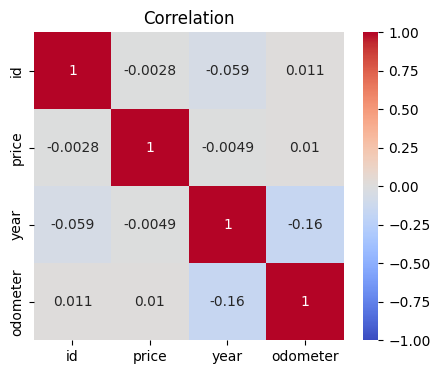

In [84]:
# Pick only the numerical features
vehicles_numeric = vehicles.select_dtypes(include=['float64', 'int64'])

# Create a correlation heatmap using just the numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(vehicles_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation')
plt.show()

No significant correlation between numerical features

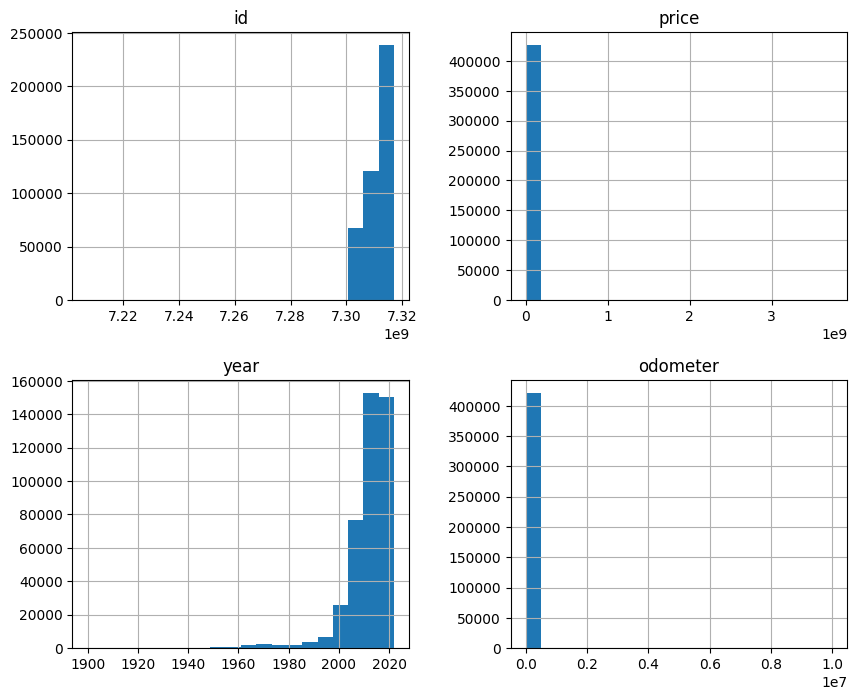

In [85]:
# Histogram/Barplots for numerical variables
vehicles_numeric.hist(bins=20, figsize=(10, 8))
plt.show()

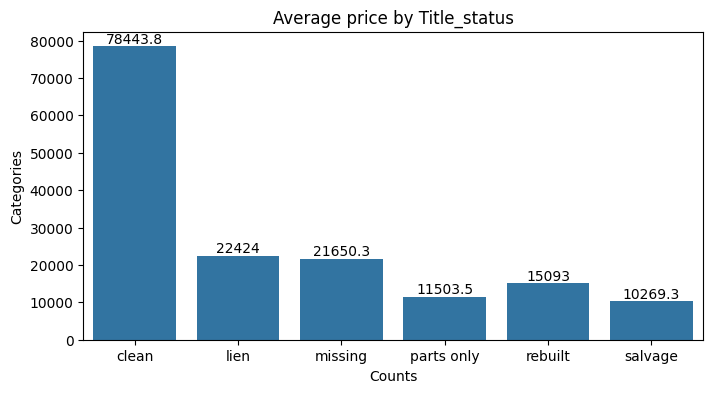

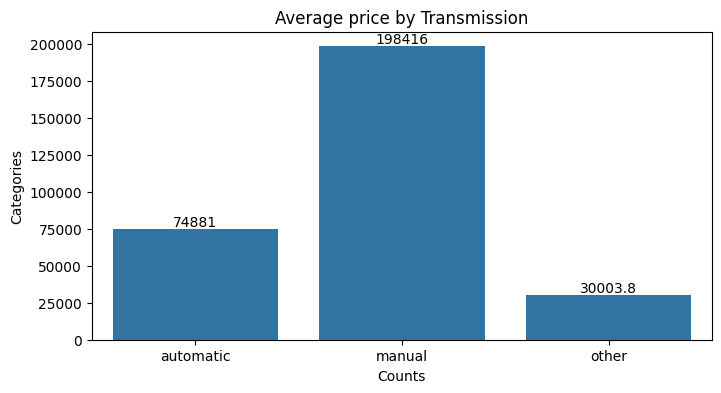

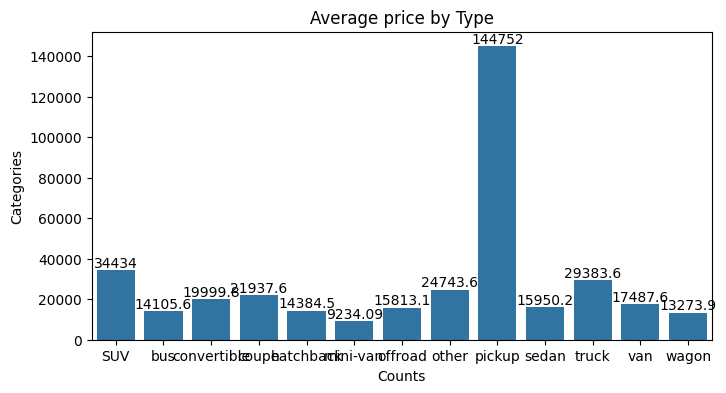

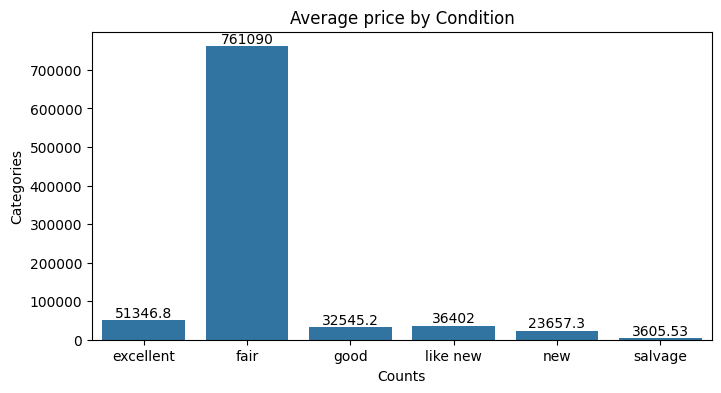

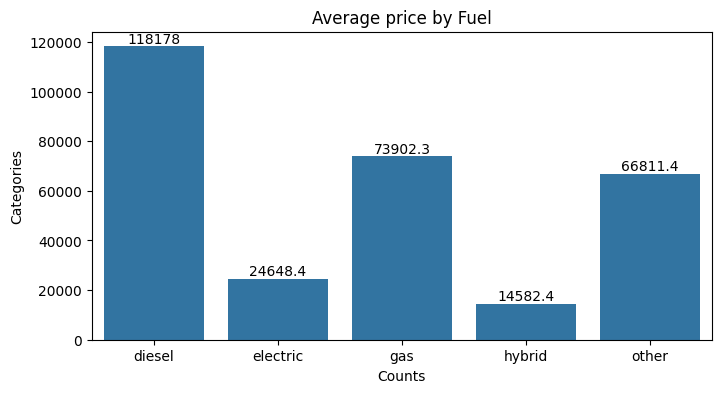

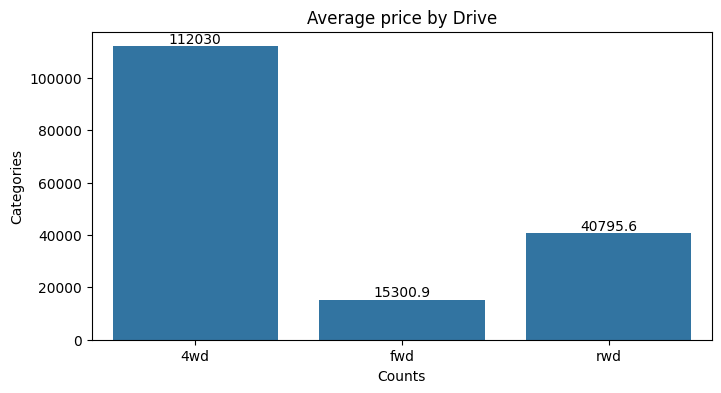

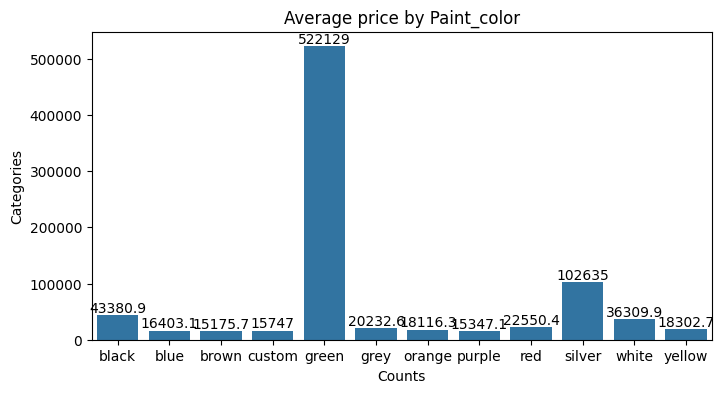

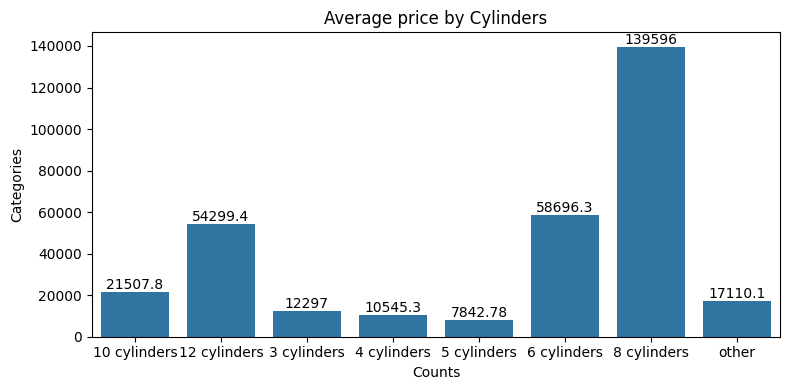

In [86]:
# Let's explore the price by categorical variable

columns = ['title_status', 'transmission', 'type', 'condition', 'fuel', 'drive','paint_color', 'cylinders' ]

for i, column in enumerate(columns):
  plt.figure(figsize=(8,4))
  mean_price = vehicles.groupby(column)['price'].mean()
  bar_plot = sns.barplot(mean_price)
  bar_plot.set(xlabel='Counts', ylabel='Categories', title='Average price by {0}'.format(column.capitalize()))
  bar_plot.bar_label(bar_plot.containers[0])

plt.tight_layout()
plt.show()



The behavior of each categorical feauture can be observed in relation to the average price. Later when making the evaluation we will determine if any of these behaviors by category can provide us with more information

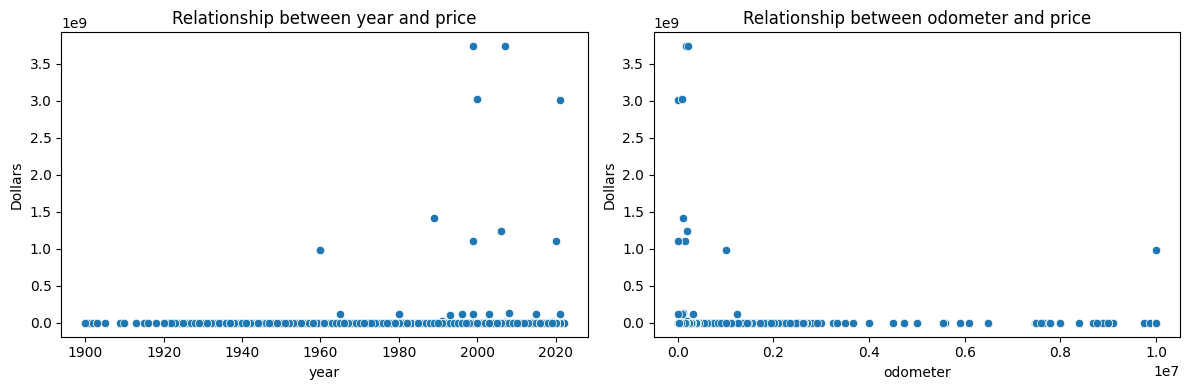

In [87]:
# Numerical variables
numerical_columns = ['year', 'odometer']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=vehicles[column], y=vehicles['price'], ax=axes[i])
    axes[i].set_title(f'Relationship between {column} and price')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Dollars')

plt.tight_layout()
plt.show()

The behavior of each numerical feautures can be observed in relation to the average price. Later when making the evaluation we will determine if any of these behaviors by category can provide us with more information.

In the graph for both year and odometer, outliers can be seen that can be modified in the Data Preparation

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

We eliminated the id and VIN columns because they do not have information potentially predictive of the price.


In [88]:
vehicles1 = vehicles.drop(columns=["id", "VIN"])

There are more than half of the null records in the size column, for this reason we'll eliminate the entire column

In [89]:
vehicles1 = vehicles1.drop(columns=["size"])

Imputations for missing values using the mod for every feature.

Note that the imputation of the odometers variable will be done later, after the elimination of records with zeros

In [90]:
#Imputation for missing values
vehicles1['year'].fillna(vehicles1['year'].mode()[0], inplace=True)
vehicles1['manufacturer'].fillna(vehicles1['manufacturer'].mode()[0], inplace=True)
vehicles1['condition'].fillna(vehicles1['condition'].mode()[0], inplace=True)
vehicles1['cylinders'].fillna(vehicles1['cylinders'].mode()[0], inplace=True)
vehicles1['fuel'].fillna(vehicles1['fuel'].mode()[0], inplace=True)
vehicles1['title_status'].fillna(vehicles1['title_status'].mode()[0], inplace=True)
vehicles1['transmission'].fillna(vehicles1['transmission'].mode()[0], inplace=True)
vehicles1['drive'].fillna(vehicles1['drive'].mode()[0], inplace=True)
vehicles1['type'].fillna(vehicles1['type'].mode()[0], inplace=True)
vehicles1['paint_color'].fillna(vehicles1['paint_color'].mode()[0], inplace=True)


<ipython-input-90-1628fc1facb0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles1['year'].fillna(vehicles1['year'].mode()[0], inplace=True)
<ipython-input-90-1628fc1facb0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

Let's check null records

In [91]:
vehicles1.dropna()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,4wd,pickup,white,al
28,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,4wd,pickup,blue,al
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,4wd,pickup,red,al
30,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,4wd,pickup,red,al
31,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226,clean,other,fwd,sedan,white,wy
426876,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174,clean,other,4wd,hatchback,white,wy
426878,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112,clean,other,fwd,sedan,silver,wy


In [92]:
vehicles1.dropna().shape

(417285, 15)

Records with price = 0 are deleted
Records with odometer = 0 are deleted

In [93]:
vehicles1.drop(vehicles1[(vehicles1['price'] == 0)].index, inplace=True)
vehicles1.drop(vehicles1[(vehicles1['odometer'] == 0)].index, inplace=True)


Outliers evaluation on price. Then after evaluate histogram Price > $100,000 it is droped from the data set. This change represent a huge impact in the model as you would see later in the Modeling part.


In [94]:
#Outliers
vehicles1.drop(vehicles1[(vehicles1['price'] > 100000)].index, inplace=True)

In [95]:
vehicles1['odometer'].fillna(vehicles1['odometer'].mode()[0], inplace=True)

<ipython-input-95-137ec552a5a1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles1['odometer'].fillna(vehicles1['odometer'].mode()[0], inplace=True)


#The model column is eliminated because the data is unstructured and analysis is difficult

In [96]:
vehicles1 = vehicles1.drop(columns=["model"])

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [97]:
!pip install category_encoders

Import libraries for Modeling

In [98]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from category_encoders.james_stein import JamesSteinEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# Define your features (X) and your target variable (y)

In [99]:
X = vehicles1.drop(columns=['price'])  # Here we delete the price because it's the target variable
y = vehicles1['price']  # This is our target variable

# Divide the dataset into train/test

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
print(f"Train set size: {X_train.shape}. Number of labels in the train set: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Number of labels in the test set: {y_test.shape}")

Train set size: (313778, 13). Number of labels in the train set: (313778,)
Test set size: (78445, 13). Number of labels in the test set: (78445,)


We defined a Categorical list of columns and a Numerical List of Columns for future use.

In [102]:
categorical_columns = ['title_status', 'transmission', 'type', 'condition', 'fuel', 'drive','paint_color', 'cylinders', 'region', 'manufacturer', 'state' ]

In [103]:
numerical_columns = ['year', 'odometer']

We create the function Generate Model that receive de Model Transformer and X train, X test, y train and y test.
The function run the fit for trian data and predict for train and test data. Calculated MSE (Mean Squared Error), RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) for train and test data and Determination coefficient for the Model Transformer.

The function save that information on the DataSet "metrics" for future Evaluation

In [104]:
metrics = []

def generate_model(model_conf, model_transformer, X_train, X_test, y_train, y_test):
  model_transformer.fit(X_train, y_train)
  y_train_pred = model_transformer.predict(X_train)
  y_test_pred = model_transformer.predict(X_test)
  # Mean Absolute Error
  mae_train = mean_absolute_error(y_train, y_train_pred)
  mae_test  = mean_absolute_error(y_test, y_test_pred)
  # Root Mean Squared Error
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
  rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))
  # Mean Squared Error
  mse_train = mean_squared_error(y_train, y_train_pred)
  mse_test  = mean_squared_error(y_test, y_test_pred)
  # R² (Determination coefficient)
  r2 = r2_score(y_test, y_test_pred)

  metrics.append({ 'Model': model_conf, 'MAE Train': mae_train,  'MAE Test': mae_test, 'MSE Train': mse_train,  'MSE Test': mse_test, 'RMSE Train': rmse_train, 'RMSE Test': rmse_test, 'Determination coefficient': r2 })
  print(f'{model_conf} MAE Train: {mae_train: .2f}')
  print(f'{model_conf} MAE Test: {mae_test: .2f}')
  print(f'{model_conf} MSE Train: {mse_train: .2f}')
  print(f'{model_conf} MSE Test: {mse_test: .2f}')
  print(f'{model_conf} RMSE Train: {rmse_train: .2f}')
  print(f'{model_conf} RMSE Test: {rmse_test: .2f}')
  print(f'{model_conf} Determination coefficient: {r2: .2f}')

Here we stated to create each model and run Generate Model function to determined the efficient of the model

In [105]:
model_transformer = make_column_transformer((JamesSteinEncoder(), categorical_columns),
                                            (StandardScaler(), numerical_columns),
                                            remainder='passthrough')
model_pipe = Pipeline([('transformer', model_transformer), ('linreg', LinearRegression())])
generate_model('Model with James Stein Encoder and Standard Scaler', model_pipe, X_train, X_test, y_train, y_test)

Model with James Stein Encoder and Standard Scaler MAE Train:  7901.78
Model with James Stein Encoder and Standard Scaler MAE Test:  7961.04
Model with James Stein Encoder and Standard Scaler MSE Train:  123791346.05
Model with James Stein Encoder and Standard Scaler MSE Test:  125835416.14
Model with James Stein Encoder and Standard Scaler RMSE Train:  11126.16
Model with James Stein Encoder and Standard Scaler RMSE Test:  11217.64
Model with James Stein Encoder and Standard Scaler Determination coefficient:  0.41


Result:

**(Root Mean Squared Error):** Improving the model significantly to 11,217 meaning that, on average, the model is off by $11,217 when predicting price.

**R² (Coefficient of Determination):** 0.406 mean that, 41% of the variation in price can be explained by the variables in the model.


In [106]:
model_transformer = make_column_transformer((OneHotEncoder(), categorical_columns), remainder='passthrough')
model_pipe = Pipeline([('transformer', model_transformer), ('linreg', LinearRegression())])
generate_model('Model with One Hot Encoder', model_pipe, X_train, X_test, y_train, y_test)


Model with One Hot Encoder MAE Train:  8361.86
Model with One Hot Encoder MAE Test:  8406.77
Model with One Hot Encoder MSE Train:  135717995.31
Model with One Hot Encoder MSE Test:  137541563.03
Model with One Hot Encoder RMSE Train:  11649.81
Model with One Hot Encoder RMSE Test:  11727.81
Model with One Hot Encoder Determination coefficient:  0.35


Result:

**(Root Mean Squared Error):**  11727.81 meaning that, on average, the model is off by $11,727.81 when predicting price.

**R² (Coefficient of Determination):** 35% of the variation in price can be explained by the variables in the model.

Let's keep trying another models configuration.

In [107]:
model_transformer = make_column_transformer((JamesSteinEncoder(), categorical_columns), remainder='passthrough')
model_pipe = Pipeline([('transformer', model_transformer), ('linreg', LinearRegression())])
generate_model('Model with James Stein Encoder', model_pipe, X_train, X_test, y_train, y_test)

Model with James Stein Encoder MAE Train:  7901.78
Model with James Stein Encoder MAE Test:  7961.04
Model with James Stein Encoder MSE Train:  123791346.05
Model with James Stein Encoder MSE Test:  125835416.14
Model with James Stein Encoder RMSE Train:  11126.16
Model with James Stein Encoder RMSE Test:  11217.64
Model with James Stein Encoder Determination coefficient:  0.41


Result:

**(Root Mean Squared Error):**  11217.64 meaning that, on average, the model is off by $11217.64 when predicting price.

**R² (Coefficient of Determination):** 41% of the variation in price can be explained by the variables in the model.

Let's keep trying another models configuration.

In [108]:
model_transformer = make_column_transformer((OneHotEncoder(), categorical_columns),
                                            (PolynomialFeatures(degree = 3, include_bias = False),  numerical_columns),
                                            remainder='passthrough')
model_pipe = Pipeline([('transformer', model_transformer), ('linreg', LinearRegression())])
grid = GridSearchCV(model_pipe, {'transformer__polynomialfeatures__degree': [ 2, 3, 4 ]})
generate_model('Model with One Hot Encoder and Polynomial Features', grid, X_train, X_test, y_train, y_test)

Model with One Hot Encoder and Polynomial Features MAE Train:  9961.39
Model with One Hot Encoder and Polynomial Features MAE Test:  9977.48
Model with One Hot Encoder and Polynomial Features MSE Train:  177650135.85
Model with One Hot Encoder and Polynomial Features MSE Test:  179877386.24
Model with One Hot Encoder and Polynomial Features RMSE Train:  13328.55
Model with One Hot Encoder and Polynomial Features RMSE Test:  13411.84
Model with One Hot Encoder and Polynomial Features Determination coefficient:  0.15


Result:

**(Root Mean Squared Error):**  13411.84 meaning that, on average, the model is off by $13411.84 when predicting price.

**R² (Coefficient of Determination):** 15% of the variation in price can be explained by the variables in the model.

The worst option so far

In [109]:
model_transformer = make_column_transformer((OneHotEncoder(), categorical_columns),
                                            (StandardScaler(), numerical_columns),
                                            remainder='passthrough')
model_pipe = Pipeline([('transformer', model_transformer), ('linreg', LinearRegression())])
generate_model('Model with One Hot Encoder and Standard Scaler', model_pipe, X_train, X_test, y_train, y_test)


Model with One Hot Encoder and Standard Scaler MAE Train:  7577.42
Model with One Hot Encoder and Standard Scaler MAE Test:  7643.42
Model with One Hot Encoder and Standard Scaler MSE Train:  116622136.51
Model with One Hot Encoder and Standard Scaler MSE Test:  118827754.00
Model with One Hot Encoder and Standard Scaler RMSE Train:  10799.17
Model with One Hot Encoder and Standard Scaler RMSE Test:  10900.81
Model with One Hot Encoder and Standard Scaler Determination coefficient:  0.44


Result:

**(Root Mean Squared Error):**  10900.81 meaning that, on average, the model is off by $10900.81 when predicting price.

**R² (Coefficient of Determination):** 44% of the variation in price can be explained by the variables in the model.

So we are going to calculate the coefficients:

In [110]:
coef = []
feature_names = model_transformer.get_feature_names_out()
for index in range(0, len(model_pipe['linreg'].coef_)):
  if feature_names[index] == 'standardscaler__odometer':
    c = model_pipe['linreg'].coef_[index] / model_transformer['standardscaler'].scale_[0] # Unstandarized coefficients for numerical columns odometer
  elif feature_names[index] == 'standardscaler__year':
    c = model_pipe['linreg'].coef_[index] / model_transformer['standardscaler'].scale_[1] # Unstandarized coefficients for numerical columns year
  else:
    c = model_pipe['linreg'].coef_[index]  # Coefficients for categorical variables (no need to unstandarized with OneHotEncoder)
  coef.append({ 'Feature Name': feature_names[index], 'Coefficient': c })

In [111]:
categorical_subcolumns_short = ['title_status', 'transmission', 'type', 'condition', 'fuel', 'drive','paint_color', 'cylinders'] #OneHotEncoder on short list of values
categorical_subcolumns_long = ['region', 'manufacturer', 'state'] # James Stein Encoder on features with long list of values more than 40
model_transformer = make_column_transformer((OneHotEncoder(), categorical_subcolumns_short ),
                                            (JamesSteinEncoder(), categorical_subcolumns_long),
                                            (StandardScaler(), numerical_columns),
                                            remainder='passthrough')
model_pipe = Pipeline([('transformer', model_transformer), ('linreg', LinearRegression())])
generate_model('Model with James Stein Encoder and Standard Scaler', model_pipe, X_train, X_test, y_train, y_test)


Model with James Stein Encoder and Standard Scaler MAE Train:  7707.45
Model with James Stein Encoder and Standard Scaler MAE Test:  7773.45
Model with James Stein Encoder and Standard Scaler MSE Train:  120095244.56
Model with James Stein Encoder and Standard Scaler MSE Test:  122158897.56
Model with James Stein Encoder and Standard Scaler RMSE Train:  10958.80
Model with James Stein Encoder and Standard Scaler RMSE Test:  11052.55
Model with James Stein Encoder and Standard Scaler Determination coefficient:  0.42


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

We evaluate the DataSet metrics that contain all the metrics generated after model fit and prediction

In [112]:
pd.DataFrame(metrics).sort_values('Determination coefficient', ascending=False)

,Model,MAE Train,MAE Test,MSE Train,MSE Test,RMSE Train,RMSE Test,Determination coefficient
4,Model with One Hot Encoder and Standard Scaler,7577.417647,7643.422172,1.166221e+08,1.188278e+08,10799.172955,10900.814373,0.439558
5,Model with James Stein Encoder and Standard Sc...,7707.445929,7773.453615,1.200952e+08,1.221589e+08,10958.797587,11052.551631,0.423847
2,Model with James Stein Encoder,7901.780219,7961.043362,1.237913e+08,1.258354e+08,11126.155942,11217.638617,0.406507
0,Model with James Stein Encoder and Standard Sc...,7901.780219,7961.043362,1.237913e+08,1.258354e+08,11126.155942,11217.638617,0.406507
1,Model with One Hot Encoder,8361.863720,8406.769633,1.357180e+08,1.375416e+08,11649.806664,11727.811519,0.351296
3,Model with One Hot Encoder and Polynomial Feat...,9961.392054,9977.483247,1.776501e+08,1.798774e+08,13328.545901,13411.837541,0.151622


Initially we evaluate the first model with:
  - Categorical feautures: Jame Stein Encoder
  - Numerical feautures: Standard Escalar
  - Data was evaluate without eliminating price outliers.

The result was:
  - (Root Mean Squared Error): 10,817,237.93
  Interpretation: In this case, an RMSE of 10,817,237.93 means that, on average, the model is off by about 10,817,237.93 when predicting price
  - R² (Coefficient of Determination): -0.00108
  Interpretation: R² indicates the proportion of the variance in the data that is explained by the model. An R² of -0.00108 means that 0.108% of the variation in price can be explained by the variables in the model.

*An R² close to 1 indicates that the model has a very good fit. In this case, a value close to 0 is a sign that the model is not capturing a significant amount of the variability in the data.*

Because of that we revisit Data Understanding and Data Preparation, evaluate price histogram and eliminate Price Outliers (price > $100,000).

  - Result: A very significant increase in root mean squared error.

  - (Root Mean Squared Error): Improving the model significantly to 11,217 meaning that, on average, the model is off by $11,217 when predicting price.

  - R² (Coefficient of Determination): 0.406 mean that, 41% of the variation in price can be explained by the variables in the model.

**It's impressive how this change meant such a big improvement on the model**


For this reason, we removed outliers on the calculation of all the models shown, even the one with the most significant representation of the Data.

# *Finding:* **One Hot Encoder** on categorical columns and **Standard Scaler** on numerical features is the best model that we found so far.
Result:

**(Root Mean Squared Error):**  10900.81 meaning that, on average, the model is off by $10900.81 when predicting price.

**R² (Coefficient of Determination):** 44% of the variation in price can be explained by the variables in the model.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

The best model we found explains 44% of the variation in used car prices based on the variables included. With a coefficient of determination (R²) of only 0.44, the model is not perfect, but it provides some useful insights into the factors influencing used car prices. However, to make more reliable decisions, it's important to enhance the model using techniques such as:

  - Adding interactions or new features: Gaining a deeper understanding of the business can help identify additional data points that might significantly impact the model. For example, the high number of odometer readings equal to zero raises questions. While we chose to remove these records, there could be a specific reason behind this anomaly that warrants further investigation.

  - Refining business knowledge for decision-making: It's essential to collaborate with stakeholders to determine which elements of the data may be irrelevant or redundant for our model. For instance, by working with sellers, we could define a specific price range of used cars that should be considered in our analysis to ensure that the model focuses on the most relevant information.

  - Exploring more complex models: We could consider implementing more advanced models that require higher computational power, which might offer better performance and insights.

Despite its limitations, this model still provides valuable information on the factors that affect used car prices. For example, cars from manufacturers like Ferrari significantly increase the price of used cars. We also see that used cars in states like Kentucky, and regions such as Klamath Falls and West Virginia (Old), are sold at notably lower prices compared to other areas. Similarly, manufacturers like Harley Davidson, Fiat, Saturn, and Mitsubishi tend to offer used cars at much lower prices.

In [113]:
coef_df = pd.DataFrame(coef).sort_values('Coefficient')
pd.concat([coef_df.head(10), coef_df.tail(10)])


,Feature Name,Coefficient
519,onehotencoder__state_ky,-11182.124820
475,onehotencoder__manufacturer_harley-davidson,-9409.803933
472,onehotencoder__manufacturer_fiat,-8652.783398
228,onehotencoder__region_klamath falls,-8486.724390
496,onehotencoder__manufacturer_saturn,-8388.494743
489,onehotencoder__manufacturer_mitsubishi,-7806.605214
440,onehotencoder__region_west virginia (old),-7124.838951
10,onehotencoder__type_bus,-7075.119896
23,onehotencoder__condition_fair,-6467.345467
424,onehotencoder__region_twin falls,-6356.683905
